In [33]:
from neuromancer.system import Node, System
from neuromancer.psl import systems
from neuromancer.psl import plot
from neuromancer import psl

import numpy as np

In [34]:
for n, sys in systems.items():
    print(n)
    # sys().show()
    # plt.close()

Autoignition
Brusselator1D
ChuaCircuit
DoublePendulum
Duffing
LorenzSystem
LotkaVolterra
Pendulum
RosslerAttractor
ThomasAttractor
UniversalOscillator
VanDerPol
Actuator
CSTR
DuffingControl
HindmarshRose
InvPendulum
IverSimple
LorenzControl
SEIR_population
SwingEquation
Tank
ThomasAttractorControl
TwoTank
VanDerPolControl
SimpleSingleZone
Reno_full
Reno_ROM40
RenoLight_full
RenoLight_ROM40
Old_full
Old_ROM40
HollandschHuys_full
HollandschHuys_ROM100
LinearSimpleSingleZone
LinearReno_full
LinearReno_ROM40
LinearRenoLight_full
LinearRenoLight_ROM40
LinearOld_full
LinearOld_ROM40
LinearHollandschHuys_full
LinearHollandschHuys_ROM100
RCNet
Gravitational
Boids


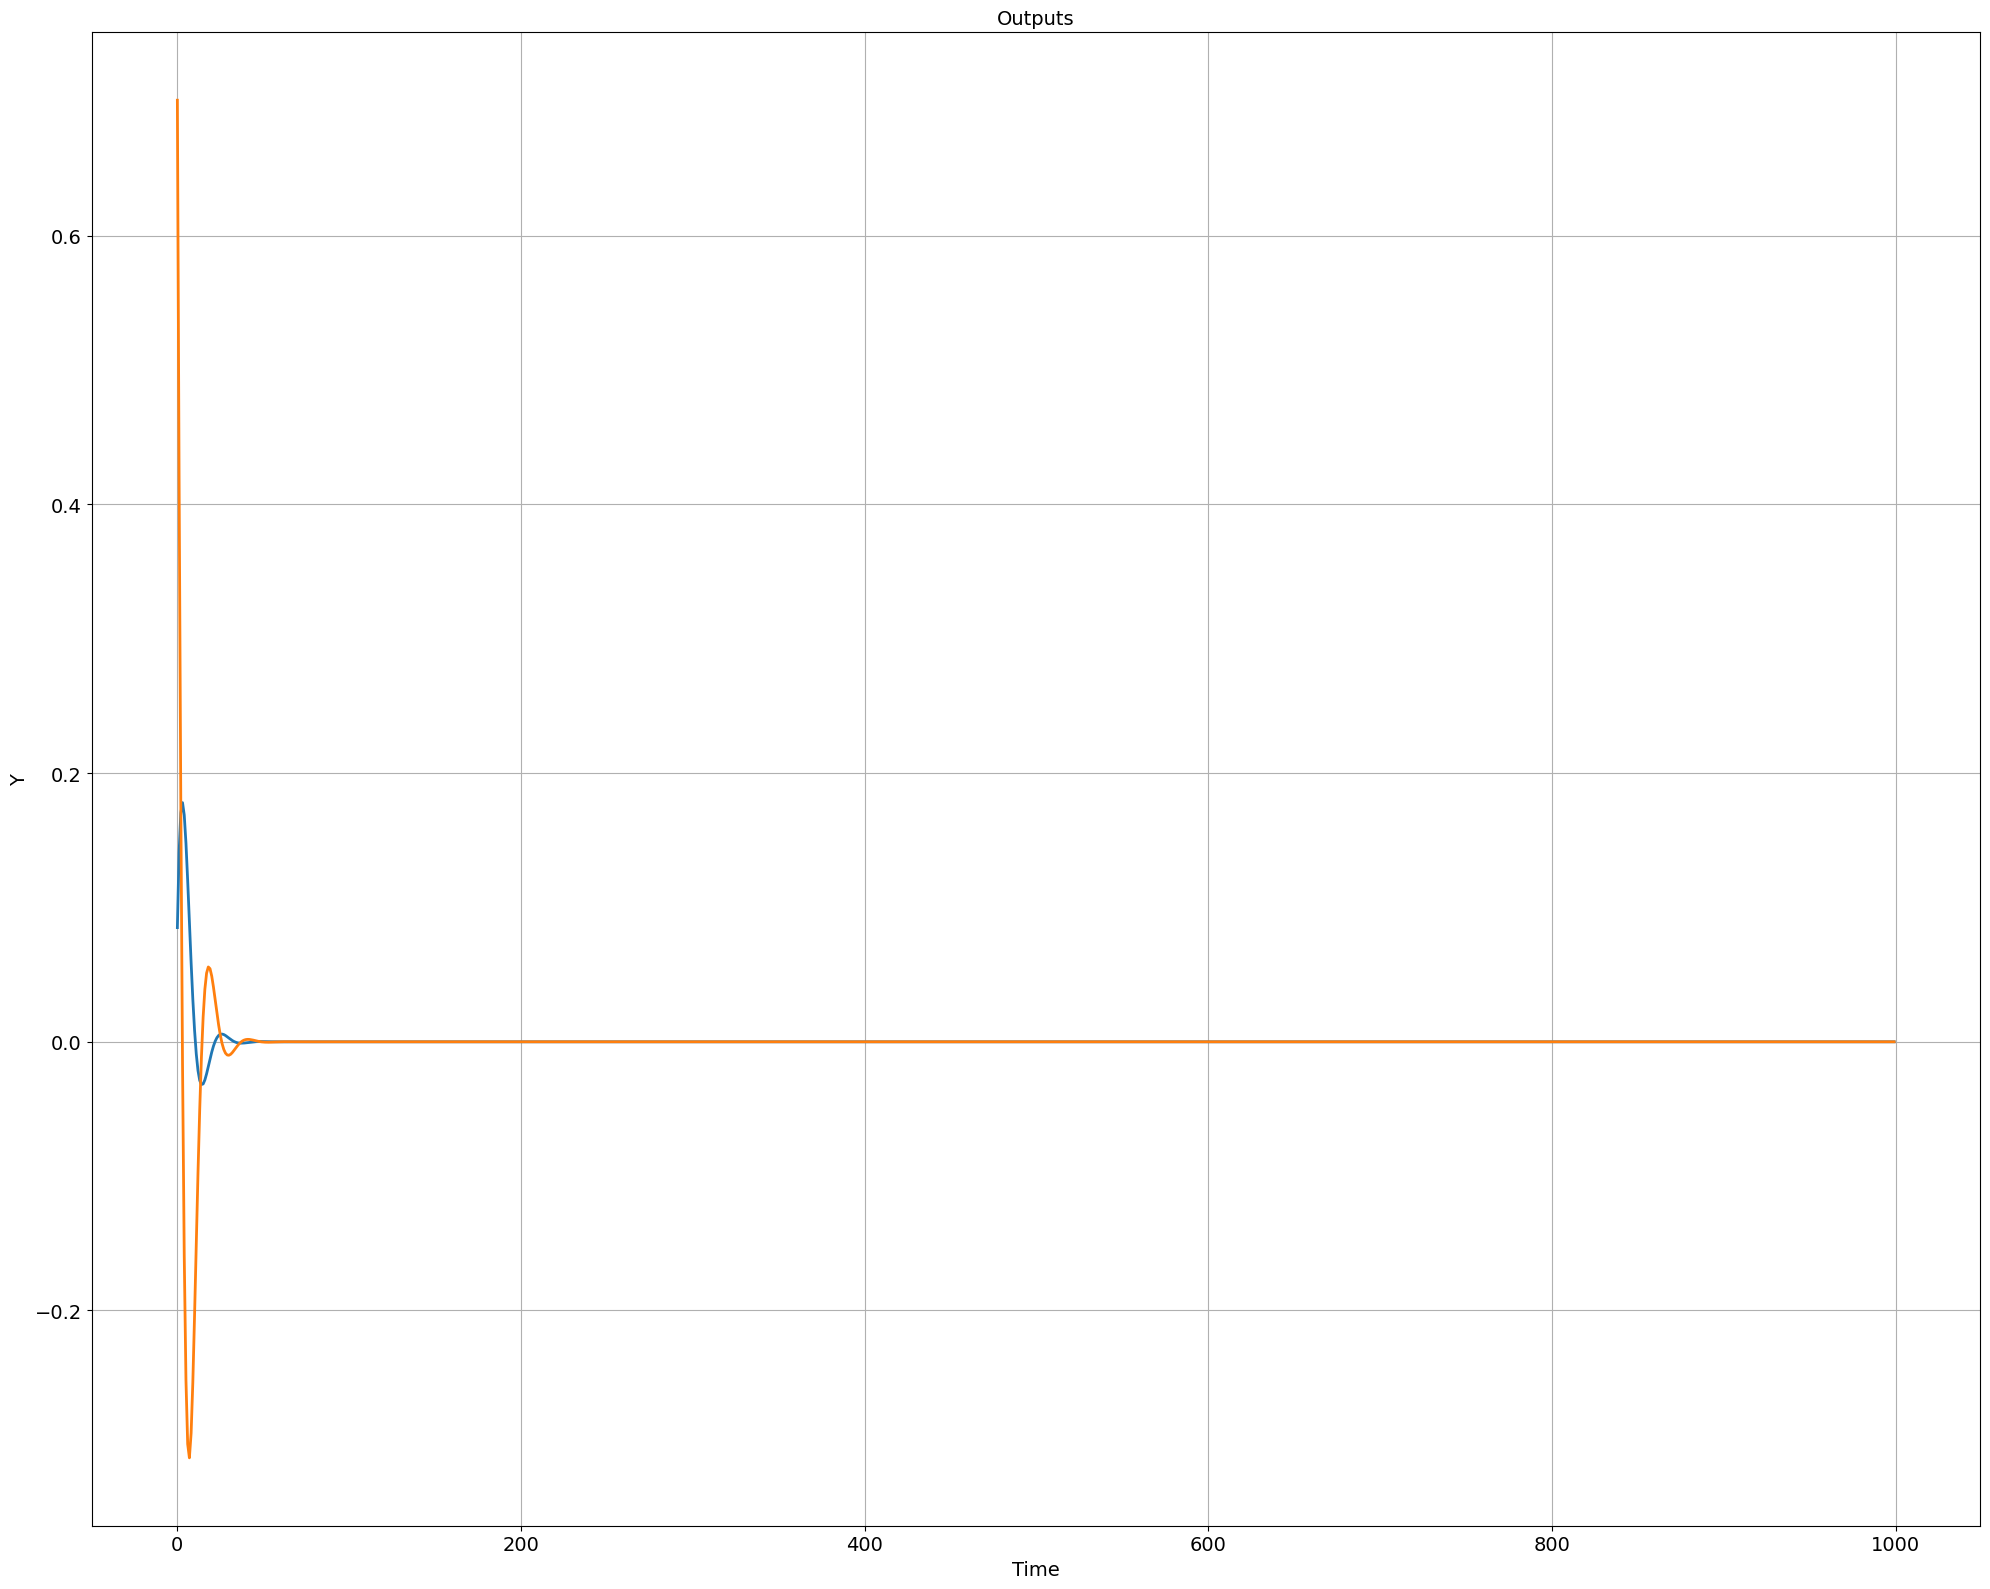

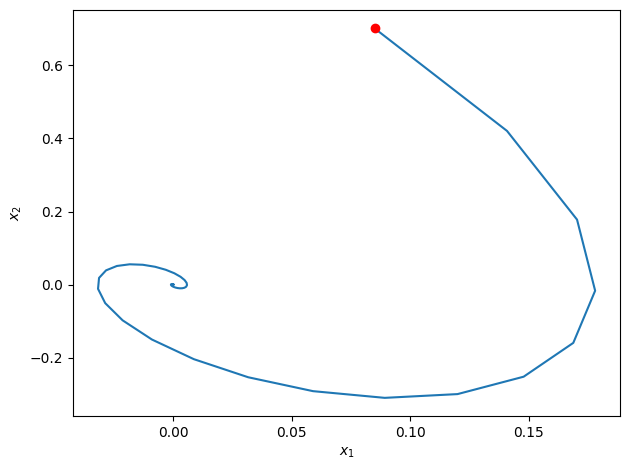

In [35]:
system = psl.systems['Pendulum']
modelSystem = system()
ts = modelSystem.ts
nx = modelSystem.nx
ny = modelSystem.ny
raw = modelSystem.simulate(nsim=1000, ts=ts)
plot.pltOL(Y=raw['Y'])
plot.pltPhase(X=raw['Y'])

In [79]:
from neuromancer.psl.base import ODE_Autonomous, cast_backend
import numpy as np

class Hamiltonian(ODE_Autonomous):

    @property
    def params(self):
        variables = {'x0': [0, -1.8]} # Initial condition
        constants = {'ts': 0.1} # Time step for numerical simulation
        parameters = {'g': -1., # parameters of the hamiltonian system
                      'l': 1.}
        meta = {}
        return variables, constants, parameters, meta
        
    @cast_backend
    def equations(self, t, x):
        return [x[1], (self.g/self.l)*np.sin(x[0])]

0.1 2 2


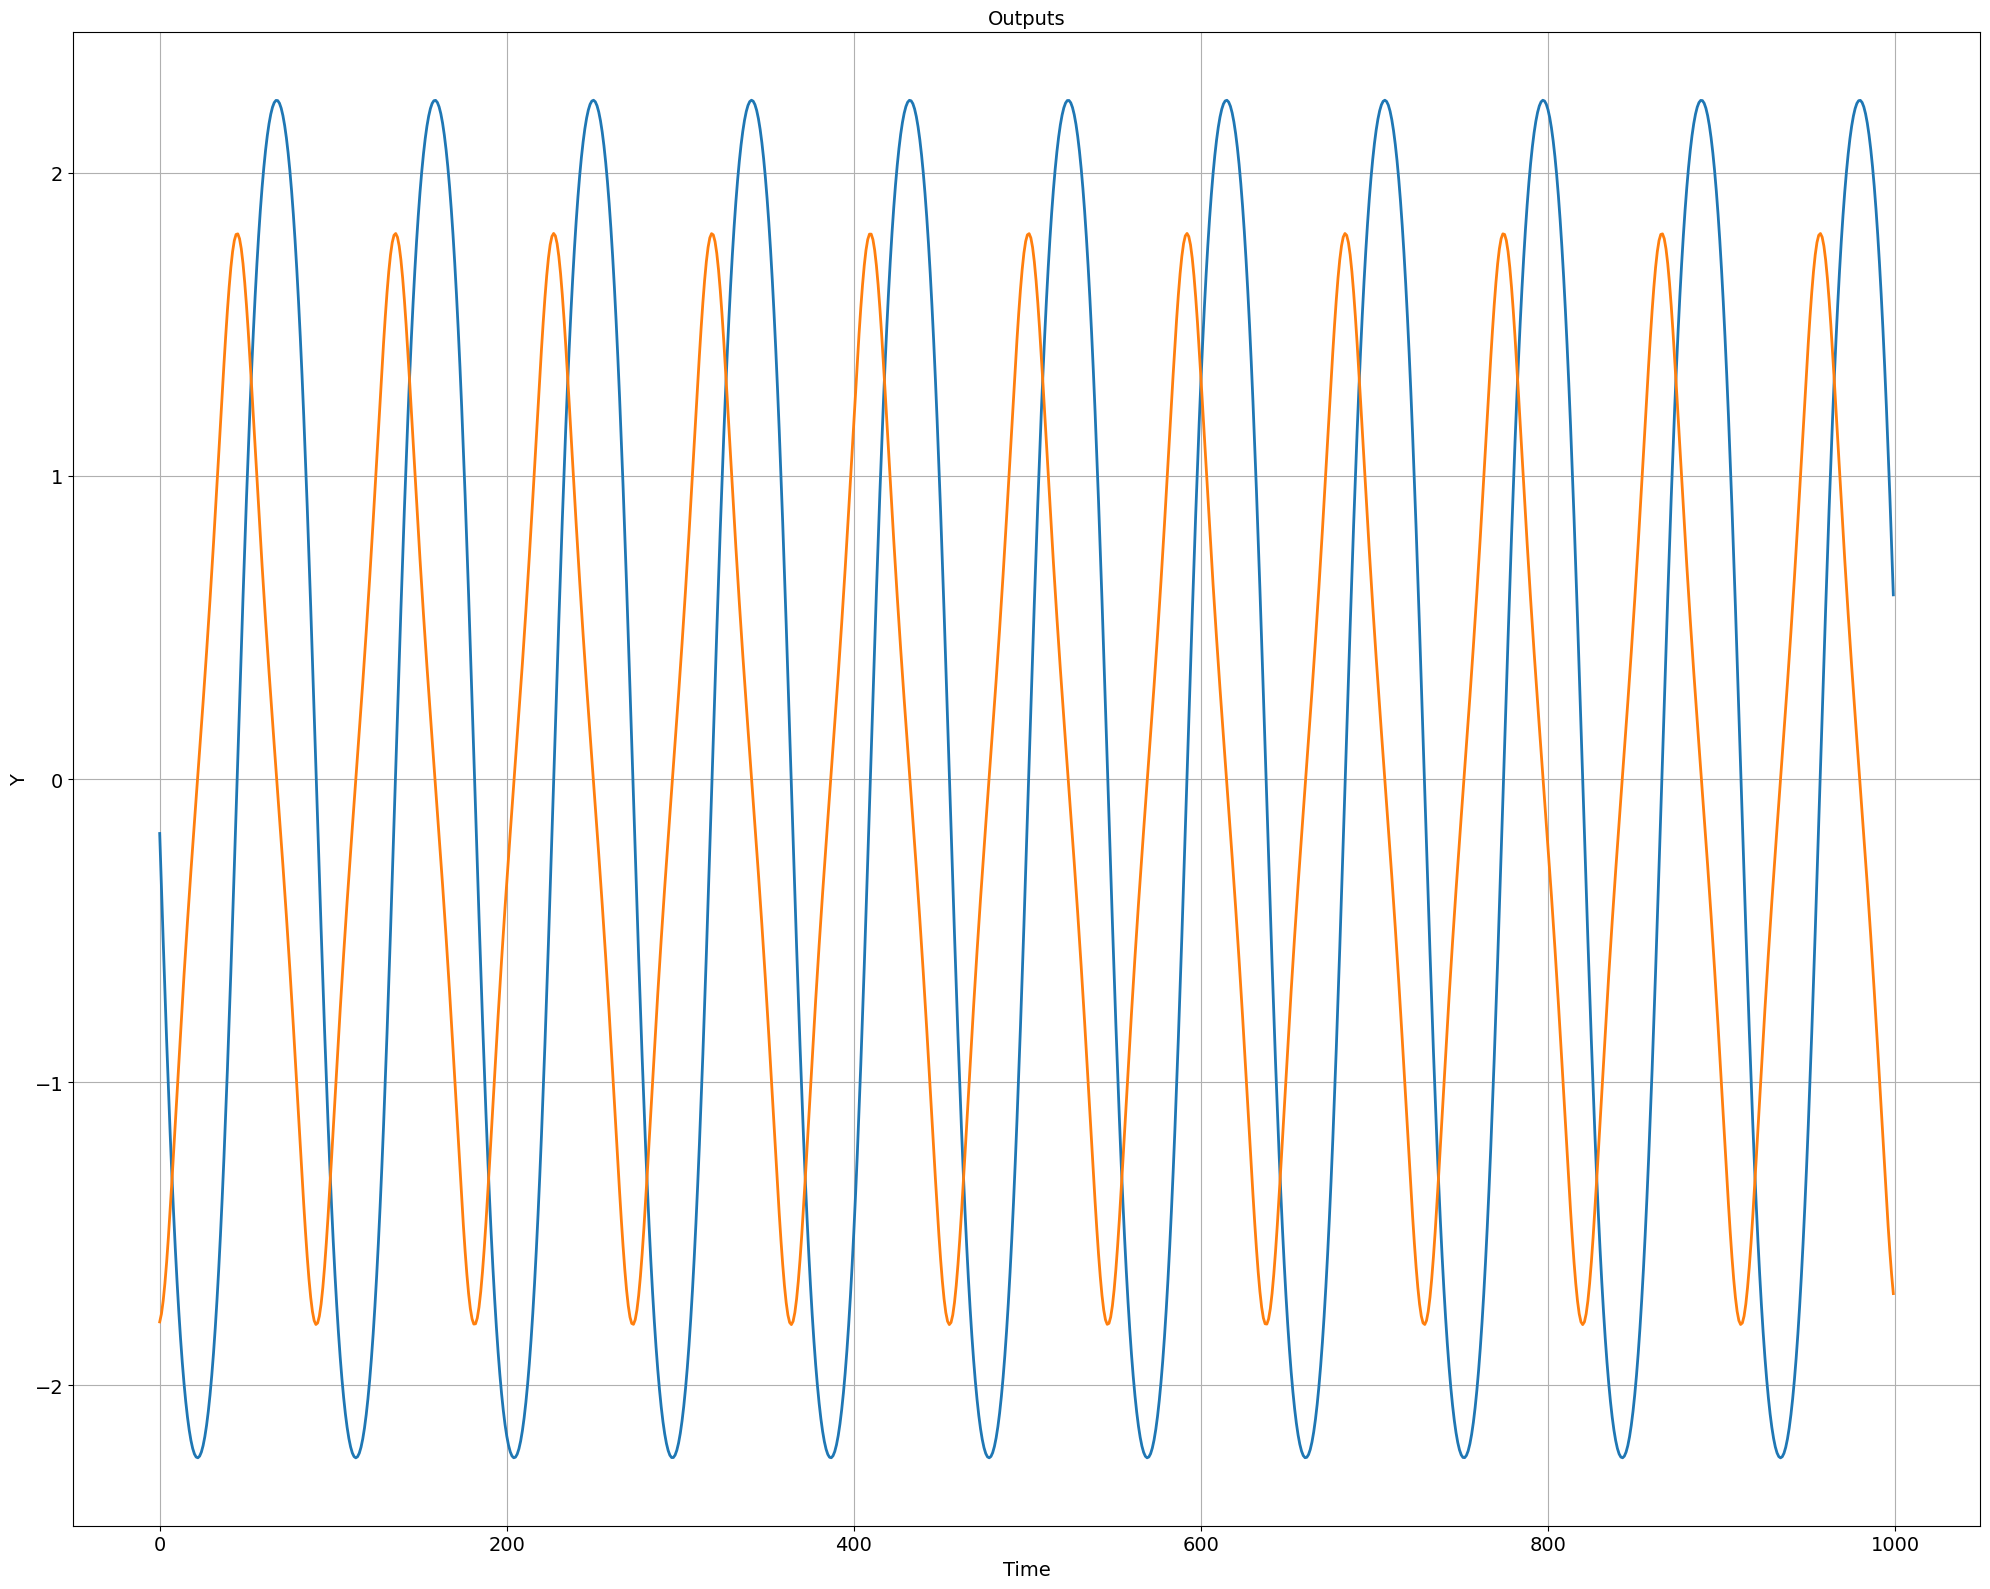

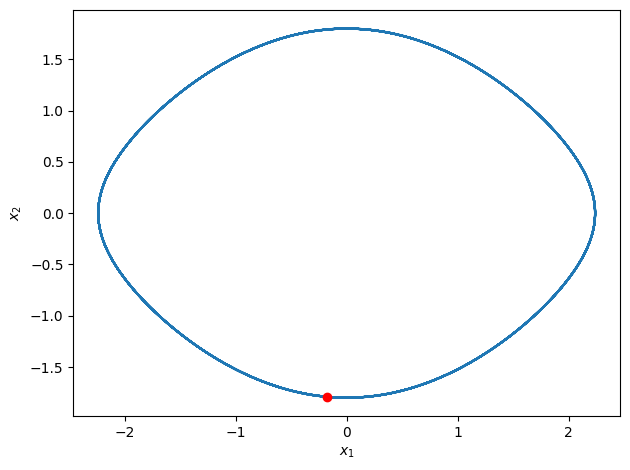

In [80]:
# −3.1,3.1
modelSystem = Hamiltonian()
ts = modelSystem.ts
nx = modelSystem.nx
ny = modelSystem.ny

print(ts, nx, ny)

raw = modelSystem.simulate(nsim=1000, ts=ts)
# raw['Y'][:, 0] = np.copy(raw['Y'][:, 0]  % 2*np.pi)
plot.pltOL(Y=raw['Y'])
plot.pltPhase(X=raw['Y'])